In [10]:
import skimage
import torch
from matplotlib import pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

https://pytorch.org/blog/towards-reproducible-research-with-pytorch-hub/

https://pytorch.org/hub/nvidia_deeplearningexamples_ssd/


In [3]:
precision = 'fp32'
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples', 'nvidia_ssd', model_math=precision)

Downloading: "https://github.com/NVIDIA/DeepLearningExamples/archive/master.zip" to /home/adam/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/adam/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 39897435.45it/s]


In [5]:
ssd_model.to('cuda')
ssd_model.eval()

SSD300(
  (feature_extractor): ResNet(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace)
  

In [6]:
utils = torch.hub.load('NVIDIA/DeepLearningExamples', 'nvidia_ssd_processing_utils')

Using cache found in /home/adam/.cache/torch/hub/NVIDIA_DeepLearningExamples_master


In [7]:
uris = [
    'http://images.cocodataset.org/val2017/000000397133.jpg',
    'http://images.cocodataset.org/val2017/000000037777.jpg',
    'http://images.cocodataset.org/val2017/000000252219.jpg'
]

In [8]:
inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs, precision == 'fp16')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


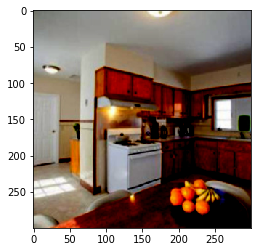

In [11]:
plt.imshow(inputs[1])

In [21]:
tensor.shape

torch.Size([3, 3, 300, 300])

In [12]:
ssd_model(tensor)[0].shape

torch.Size([3, 4, 8732])

In [13]:
ssd_model(tensor)[1].shape

torch.Size([3, 81, 8732])

In [14]:
with torch.no_grad():
    detections_batch = ssd_model(tensor)

In [15]:
results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.40) for results in results_per_input]

In [16]:
classes_to_labels = utils.get_coco_object_dictionary()

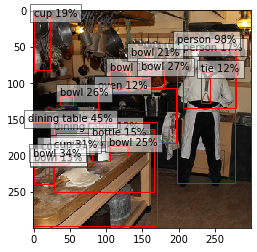

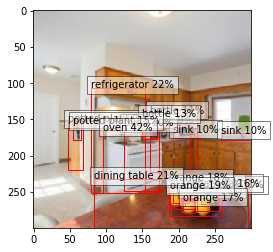

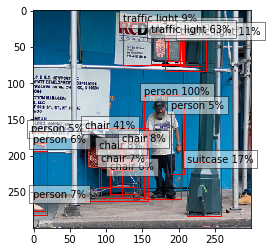

In [20]:
for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [18]:
best_results_per_input

[[array([[-0.02392861,  0.51104146,  0.56998146,  0.988102  ],
         [ 0.6593183 ,  0.14833626,  0.9241469 ,  0.7932867 ]],
        dtype=float32),
  array([61,  1]),
  array([0.445181 , 0.9813378], dtype=float32)],
 [array([[0.3203002, 0.5487606, 0.5773479, 0.8374415]], dtype=float32),
  array([70]),
  array([0.42393833], dtype=float32)],
 [array([[0.23550546, 0.5409151 , 0.5241979 , 0.87563366],
         [0.5412829 , 0.0995061 , 0.6893383 , 0.24601488],
         [0.50976026, 0.3864504 , 0.6799458 , 0.86386037]], dtype=float32),
  array([57, 10,  1]),
  array([0.40906766, 0.6330224 , 0.99920195], dtype=float32)]]

In [19]:
results_per_input

[[array([[ 0.3517716 ,  0.2728759 ,  0.43275142,  0.36855668],
         [ 0.00402109,  0.6919548 ,  0.08832045,  0.7972203 ],
         [ 0.0624499 ,  0.63523054,  0.1144826 ,  0.71524334],
         [ 0.77216583,  0.2816086 ,  0.8123471 ,  0.42219803],
         [ 0.29526883,  0.35564065,  0.6548265 ,  0.6101254 ],
         [ 0.09401613,  0.5441728 ,  0.552211  ,  0.83484644],
         [ 0.11979952,  0.61910653,  0.16157934,  0.7031522 ],
         [ 0.00397619,  0.68840635,  0.05114749,  0.76315725],
         [ 0.26985925,  0.5736629 ,  0.3518448 ,  0.69341886],
         [ 0.68808925,  0.18083751,  0.9295416 ,  0.44647896],
         [ 0.03606544,  0.6360803 ,  0.09730022,  0.71658725],
         [ 0.00109068,  0.02632473,  0.07607196,  0.2730774 ],
         [ 0.44650668,  0.20436285,  0.52642995,  0.31102914],
         [ 0.34902358,  0.620164  ,  0.43522465,  0.66510147],
         [ 0.11956532,  0.39186373,  0.17990842,  0.43495378],
         [ 0.4946827 ,  0.27040184,  0.6016125 ,  0.359